In [1]:
import sys
sys.path.extend(['/home/quic/QUIC-Projects'])

import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
DATA_DIR = Path("/home/quic/QUIC-Projects/summary_ipynb/2022/07 July/22 Fri/")
OBJ_FUNC = r'$\mathcal{L}_{\phi, \lambda}$'
DIR_NAME = "numerical_simulation_cpu1"

In [2]:
plt.style.use('./styles/figstyle.mplstyle')
plt.style.reload_library()

In [3]:
from pandas import read_csv
def load_simulation(dir_name):
    dir_path = DATA_DIR / dir_name
    epsilon_summary = read_csv(dir_path/'epsilon_summary')
    delta_summary = read_csv(dir_path/'delta_summary')
    accuracy_summary = read_csv(dir_path/'accuracy_summary')
    reference_accuracy_summary = read_csv(dir_path/'reference_accuracy_summary')
    reference_cost_summary = read_csv(dir_path/'reference_cost_summary')
    n_layers_list = np.array(epsilon_summary[epsilon_summary.columns[0]])
    n_qubits_list = np.array(epsilon_summary.columns[1:]).astype(int)

    epsilon_summary = epsilon_summary[epsilon_summary.columns[1:]]
    epsilon_summary.index = n_layers_list
    delta_summary = delta_summary[delta_summary.columns[1:]]
    delta_summary.index = n_layers_list
    accuracy_summary = accuracy_summary[accuracy_summary.columns[1:]]
    accuracy_summary.index = n_layers_list
    reference_accuracy_summary = reference_accuracy_summary[reference_accuracy_summary.columns[1:]]
    reference_accuracy_summary.index = n_layers_list
    reference_cost_summary = reference_cost_summary[reference_cost_summary.columns[1:]]
    reference_cost_summary.index = n_layers_list

    return epsilon_summary, delta_summary, accuracy_summary, reference_accuracy_summary, reference_cost_summary, n_qubits_list, n_layers_list

[0.00023736] -0.0016110998049849825 0.9491547655439355


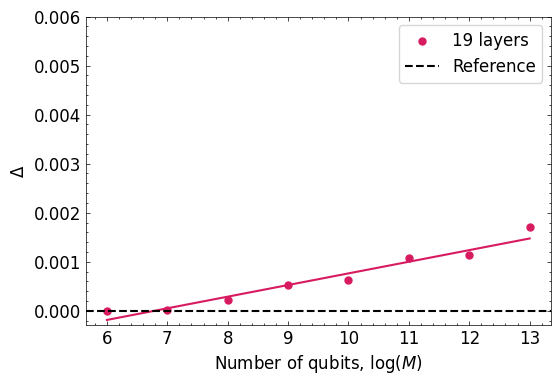

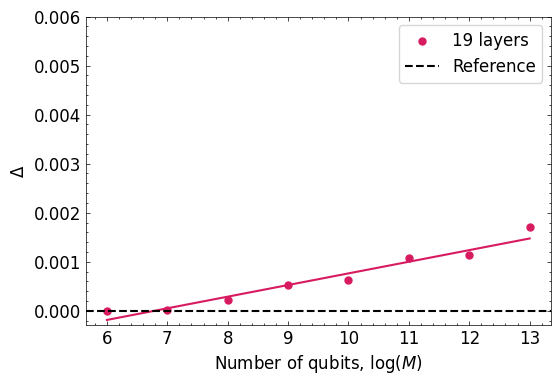

In [4]:
from sklearn.linear_model import HuberRegressor

colors = list(map(lambda x: x['color'], plt.rcParams['axes.prop_cycle']))

with plt.rc_context(rc={'figure.figsize':(6, 4), 'lines.markersize':5}):
    fig, ax = plt.subplots()
    epsilon_summary, delta_summary, accuracy_summary, _, _, n_qubits_list, n_layers_list = load_simulation(DIR_NAME)
    n_qubits_list = n_qubits_list.reshape(-1, 1)
    for i, n_layers in enumerate([19]):
        delta_list = delta_summary.loc[n_layers].to_numpy()
        model = HuberRegressor().fit(n_qubits_list, delta_list)
        print(model.coef_, model.intercept_, model.score(n_qubits_list, delta_list))
        ax.scatter(n_qubits_list, delta_list, label=f'{n_layers} layers', color=colors[i])
        if n_layers>10:
            ax.plot(n_qubits_list, model.predict(n_qubits_list))
    ax.axhline(0, color='k', linestyle='--', label='Reference')
    ax.legend()
    ax.set_xlabel(r'Number of qubits, $\log(M)$')
    ax.set_ylabel(r'$\Delta$')
    ax.set_ylim(None, 0.006)
fig.savefig('./figs/numerical_analysis_mnist_delta.png', dpi=300)
fig.savefig('./figs/numerical_analysis_mnist_delta.svg', dpi=300)
fig.savefig('./figs/numerical_analysis_mnist_delta.pdf', dpi=300)
fig

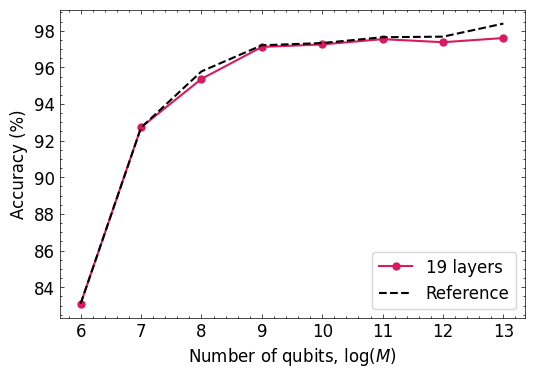

In [5]:
with plt.rc_context(rc={'figure.figsize':(6, 4), 'lines.markersize':5}):
    fig, ax = plt.subplots()
    epsilon_summary, delta_summary, accuracy_summary, reference_accuracy_summary, _, n_qubits_list, n_layers_list = load_simulation(DIR_NAME)
    n_qubits_list = n_qubits_list.reshape(-1, 1)
    for i, n_layers in enumerate([19]):
        acc_list = accuracy_summary.loc[n_layers].to_numpy()
        ax.plot(n_qubits_list, 100*acc_list, label=f'{n_layers} layers', color=colors[i], marker='o')
    ax.plot(n_qubits_list, 100*reference_accuracy_summary.iloc[-1].to_numpy(), label='Reference', color='k', linestyle='--')
    ax.legend()
    ax.set_xlabel(r'Number of qubits, $\log(M)$')
    ax.set_ylabel('Accuracy (%)')
fig.savefig('./figs/numerical_analysis_mnist_acc.png', dpi=300)
fig.savefig('./figs/numerical_analysis_mnist_acc.svg', dpi=300)
fig.savefig('./figs/numerical_analysis_mnist_acc.pdf', dpi=300)
fig

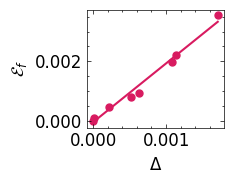

In [11]:
with plt.rc_context(rc={'figure.figsize':(2.5, 2), 'lines.markersize':5}):
    fig, ax = plt.subplots()
    epsilon_summary, delta_summary, accuracy_summary, _, _, n_qubits_list, n_layers_list = load_simulation('numerical_simulation_cpu1')
    n_qubits_list = n_qubits_list.reshape(-1, 1)
    for i, n_layers in enumerate([19]):
        delta_list = delta_summary.loc[n_layers].to_numpy()
        epsilon_list = epsilon_summary.loc[n_layers].to_numpy()
        ax.scatter(delta_list, epsilon_list, label=f'{n_layers} layers', color=colors[i])
        model = HuberRegressor().fit(delta_list.reshape(-1, 1), epsilon_list)
        ax.plot(delta_list, model.predict(delta_list.reshape(-1, 1)), color=colors[i])
    # ax.legend()
    ax.set_ylabel(r'$\mathcal{E}_{f}$')
    ax.set_xlabel(r'$\Delta$')
    plt.tight_layout()
fig.savefig('./figs/numerical_analysis_mnist_inset.png', dpi=300)
fig.savefig('./figs/numerical_analysis_mnist_inset.svg', dpi=300)
fig.savefig('./figs/numerical_analysis_mnist_inset.pdf', dpi=300)
fig